# PART 1 and PART 2 Plots

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import sin,pi
import random

def Generate_Synthetic_Dataset(size):
    Xsize = size
    start = 0
    end   = 1
    Noise = np.random.normal(0,0.3, Xsize)                      # np.random.normal(Mean, Sd, Size)
    X = np.linspace(start, end, num=Xsize)                      # np.linspace(Start, End, Size)
    Y = np.sin(2*np.pi*X)
    Y = Y+Noise
    df = pd.DataFrame()
    df['X'] = pd.Series(X)
    df['Target'] = pd.Series(Y)
    df.to_csv('Dataset'+str(size)+'.csv', sep='\t', encoding='utf-8')
    plt.figure(figsize=(12, 6))
    plt.scatter(X,Y)
    plt.ylabel('Target')
    plt.xlabel('X')
    plt.title('Synthetic Dataset Size:'+str(size))
    plt.savefig('Syn_Data_size_'+str(size)+'.png')
    plt.show()
    plt.close()
    return X,Y

def Split_Train_Test(X,Y):
    Xsize = len(X)
    Shuffler = np.linspace(0,Xsize-1,Xsize)
    random.shuffle(Shuffler)
    TrainX = []
    TrainY = []
    TestX = []
    TestY = []
    for i in range(0,Xsize):
        if i < int(0.8*Xsize):
            TrainX.append(X[int(Shuffler[i])])
            TrainY.append(Y[int(Shuffler[i])])
        else:
            TestX.append(X[int(Shuffler[i])])
            TestY.append(Y[int(Shuffler[i])])

    TrainX = np.array(TrainX)
    TrainY = np.array(TrainY)
    TestX = np.array(TestX)
    TestY = np.array(TestY)
    return TrainX, TrainY, TestX, TestY


def gradient_descent(X, Y, alpha, degree, iteration):
    m = len(X)
    Pcost = []
    Pitr  = []
    # Parameters
    Thita = np.zeros(degree+1)
    for itr in range(0,iteration):
        Pitr.append(itr)
        # Hypothesis
        H = np.zeros(m)
        for i in range(0,degree+1):
            H = H+ Thita[i]*(np.power(X,i))
            
        # Cost
        Cost = (1.0/(2.0*m))*( np.sum( ((H-Y)*(H-Y))*((H-Y)*(H-Y)) ) )
        Pcost.append(Cost)
        # Gradient Descent
        for i in range(0,degree+1):
            Temp = ((H-Y)*(H-Y)*(H-Y))*(np.power(X,i))
            Thita[i] = Thita[i] - (alpha*(2.0/m)*(np.sum(Temp)))
    
    Pcost = np.array(Pcost)
    Pitr  = np.array(Pitr)
    plt.title('Learning Curve when n='+str(degree))
    plt.xlabel('No of iterations')
    plt.ylabel('Cost')
    plt.plot(Pitr, Pcost)
    return Thita

def PredictError(X, Y, Thita):
    m = len(X)
    degree = len(Thita)-1
    H = np.zeros(m)
    for i in range(0,degree+1):
        H = H+ Thita[i]*(np.power(X,i))
    Cost = (1.0/(2.0*m))*( np.sum( ((H-Y)*(H-Y))*((H-Y)*(H-Y)) ) )
    return Cost

def Predict(X, Thita):
    degree = len(Thita)-1
    H = np.zeros(len(X))
    for i in range(0,degree+1):
        H = H+ Thita[i]*(np.power(X,i))
    return H

def DataFrame_Linear_Regression(TrainX, TrainY, TestX, TestY, No_of_iteration):
    DF_Thita = pd.DataFrame()
    DF_Error = pd.DataFrame()
    TestError =[]
    TrainError =[]
    # Varing N from 1 to 9
    for N in range(9,0,-1):
        plt.figure(figsize=(12, 6))
        plt.subplot(1,2,1)
        # Estimating the Parameters
        Thita = gradient_descent(TrainX, TrainY, 0.05, N, No_of_iteration)

        # Plot of Hypothesis, Test Set, Prediction on Test Set, Train Set, Prediction on Train Set
        plt.subplot(1,2,2)
        plt.scatter(TrainX, TrainY, color ='b',marker='*', label= 'Train Set')
        plt.scatter(TestX, TestY, color ='r', marker='+',label= 'Test Set')
        
        ALL = np.linspace(0, 1 , 50)
        PredY = Predict(ALL, Thita)
        plt.plot(ALL, PredY, color='g', linestyle='--', label='Hypothesis' )
        
        PredY = Predict(TrainX, Thita)
        plt.scatter(TrainX, PredY, color='c',  marker='*', label='Prediction on Train Set' )
        
        PredY_test = Predict(TestX, Thita)
        plt.scatter(TestX, PredY_test, color='g',  marker='+', label='Prediction on Test Set' )        
        
        plt.title('n = '+str(N)+'    Learning Rate = 0.05')
        plt.xlabel('X')
        plt.ylabel('Target')
        plt.legend()
        plt.savefig('Data'+str(len(TrainX)+len(TestX))+'_N'+str(N)+'.png')
        plt.show()
        plt.close()
        
        # Storing the Thita in a Dataframe
        DF_Thita['N='+str(N)]=pd.Series(Thita)
        a = PredictError(TestX,TestY,Thita)
        b = PredictError(TrainX,TrainY,Thita)
        print "Squared Error in Test Set when N=",N, " is:", a
        print "Squared Error in Train Set when N=",N, " is:", b
        TestError.append(a)
        TrainError.append(b)

    TestError = TestError[::-1]
    TrainError = TrainError[::-1]
    TestError = np.array(TestError)
    TrainError = np.array(TrainError)
    
    # plot of train error and test error
    Error_X = np.linspace(1,9,9)
    plt.title("Squared error on both train and test data")
    plt.plot(Error_X, TrainError, color='g', marker='o', linestyle='--', label='Train Error')
    plt.plot(Error_X, TestError,  color='r', marker='o', linestyle='--', label='Test Error' )
    plt.xlabel('N')
    plt.ylabel('Test Error and Train Error')
    plt.legend()
    plt.savefig('Train_Test_Squared_Error'+str(len(TrainX)+len(TestY))+'.png')
    plt.show()
    plt.close()

    # Return Purpose
    for i in range(9,0,-1):
        DF_Thita['N='+str(i)].fillna(' ',inplace=True)
        DF_Error['Test Error']=pd.Series(TestError)
        DF_Error['Train Error']=pd.Series(TrainError)
    DF_Thita.rename(index={0:'Thita0',1:'Thita1',2:'Thita2',3:'Thita3',4:'Thita4',5:'Thita5',6:'Thita6',7:'Thita7',8:'Thita8',9:'Thita9'},inplace=True)
    DF_Error.rename(index={0:'N=1',1:'N=2',2:'N=3',3:'N=4',4:'N=5',5:'N=6',6:'N=7',7:'N=8',8:'N=9'},inplace=True)
    return DF_Thita, DF_Error

#========================================= PART1 ================================== #

When Dataset Size = 10


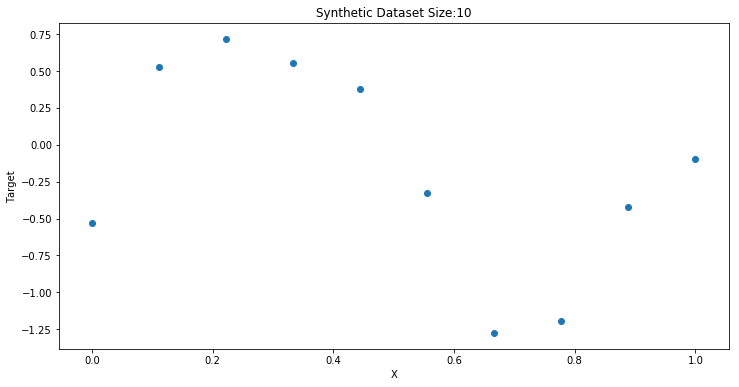

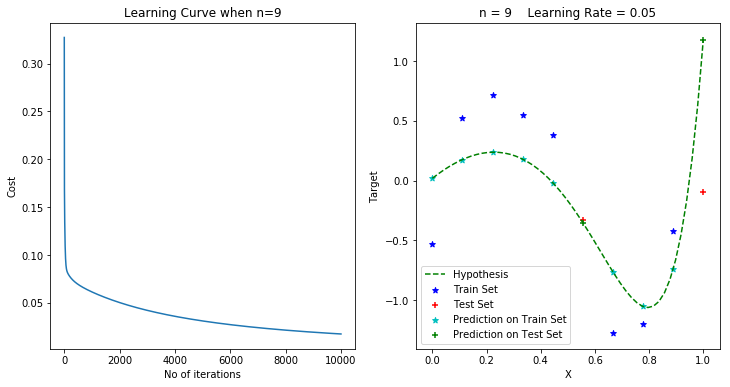

Squared Error in Test Set when N= 9  is: 0.646877016055043
Squared Error in Train Set when N= 9  is: 0.017578904094414264


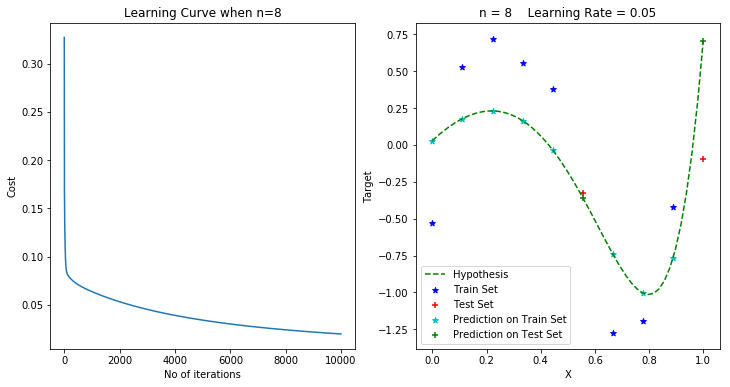

Squared Error in Test Set when N= 8  is: 0.10312668835280793
Squared Error in Train Set when N= 8  is: 0.019718697045166565


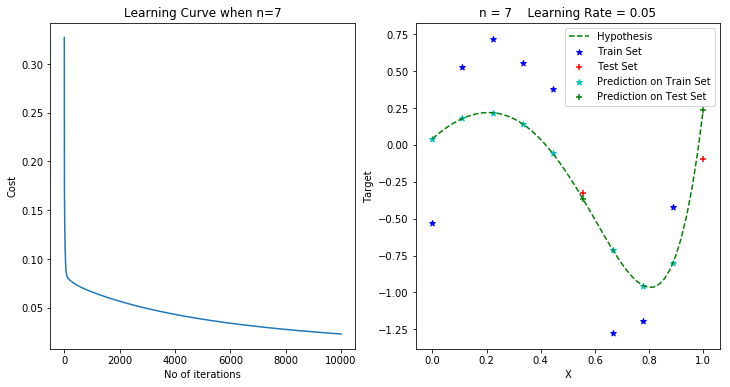

Squared Error in Test Set when N= 7  is: 0.00313211521573151
Squared Error in Train Set when N= 7  is: 0.023071979387837047


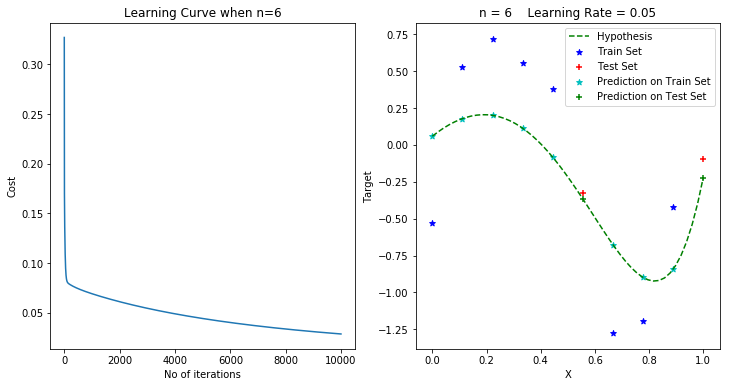

Squared Error in Test Set when N= 6  is: 6.369152044306627e-05
Squared Error in Train Set when N= 6  is: 0.028456213217076747


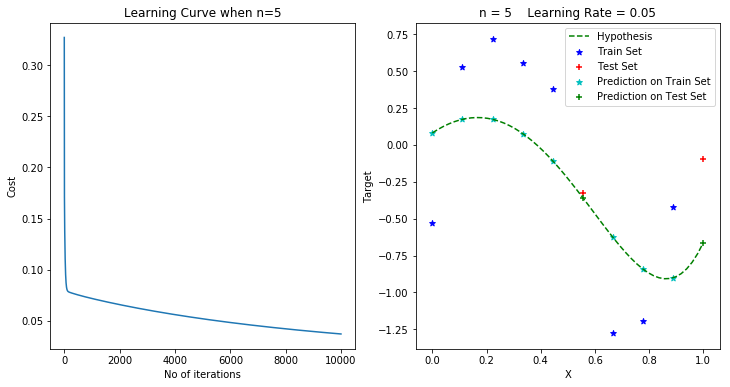

Squared Error in Test Set when N= 5  is: 0.02583390961325126
Squared Error in Train Set when N= 5  is: 0.03702861783094155


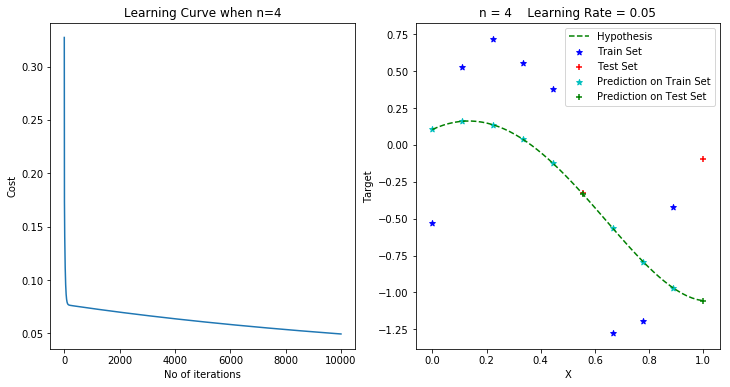

Squared Error in Test Set when N= 4  is: 0.21186406182139422
Squared Error in Train Set when N= 4  is: 0.049488029494869315


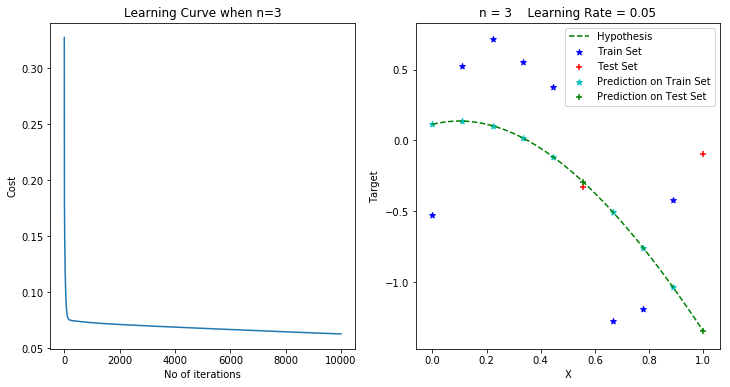

Squared Error in Test Set when N= 3  is: 0.6106776217742748
Squared Error in Train Set when N= 3  is: 0.0626949973036947


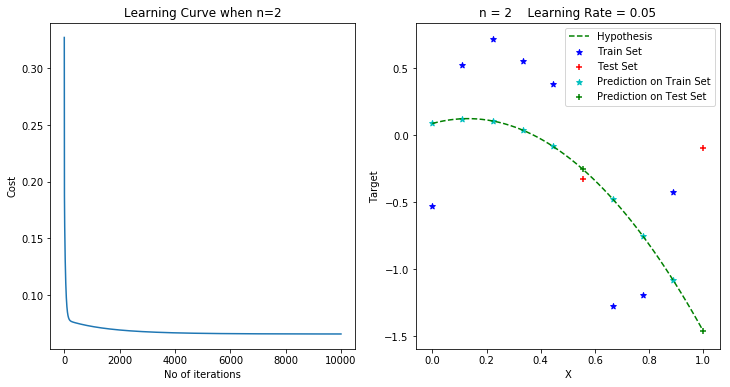

Squared Error in Test Set when N= 2  is: 0.8662951627010252
Squared Error in Train Set when N= 2  is: 0.06577638818313661


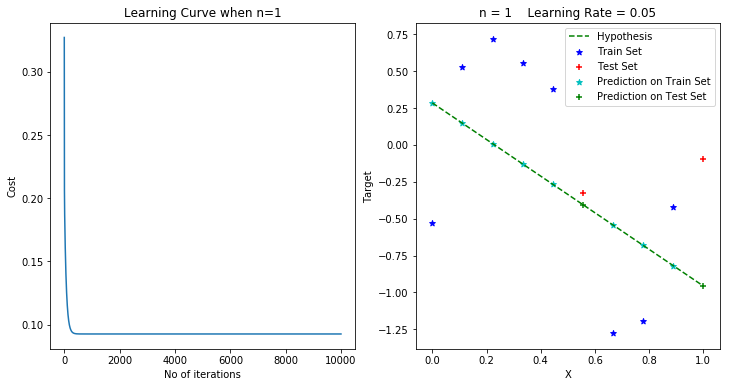

Squared Error in Test Set when N= 1  is: 0.13627353534329606
Squared Error in Train Set when N= 1  is: 0.09255756863427328


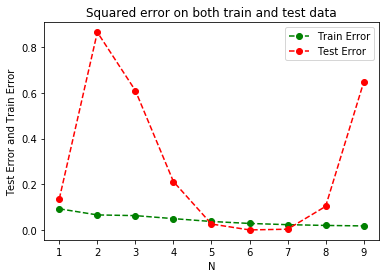

In [41]:
No_of_iteration = 10000
df = pd.DataFrame()

print "When Dataset Size = 10"
SIZE = 10
X,Y = Generate_Synthetic_Dataset(SIZE)
TrainX, TrainY, TestX, TestY = Split_Train_Test(X,Y)
DF_Thita10, DF_Error10 = DataFrame_Linear_Regression(TrainX, TrainY, TestX, TestY, No_of_iteration)
DF_Thita10.to_csv("Parameters_10.csv", sep='\t', encoding='utf-8')
DF_Error10.to_csv("Train_Test_Error_10.csv", sep='\t', encoding='utf-8')
X1=X
Y1=Y

When Dataset Size = 100


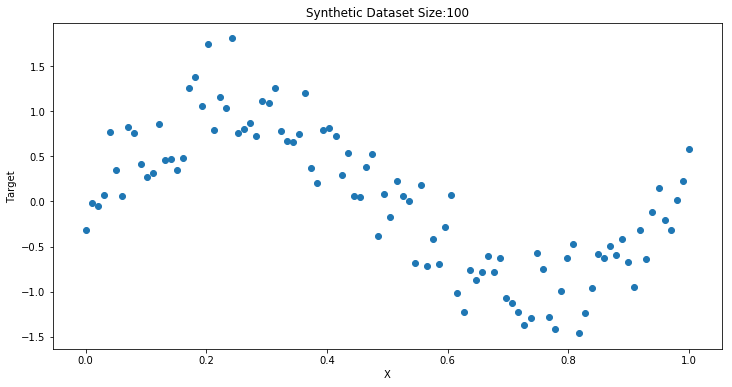

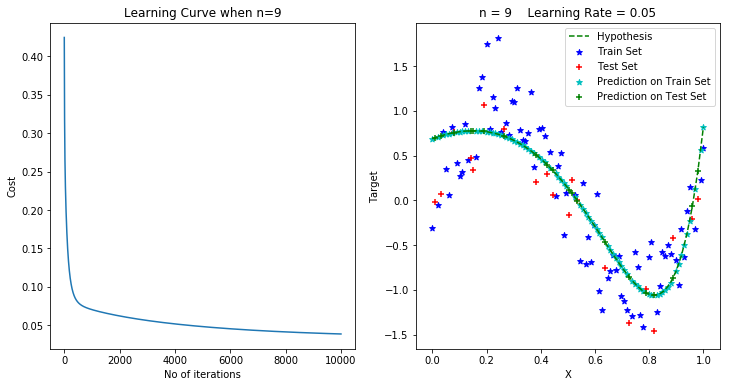

Squared Error in Test Set when N= 9  is: 0.016768531589877452
Squared Error in Train Set when N= 9  is: 0.038597524923883034


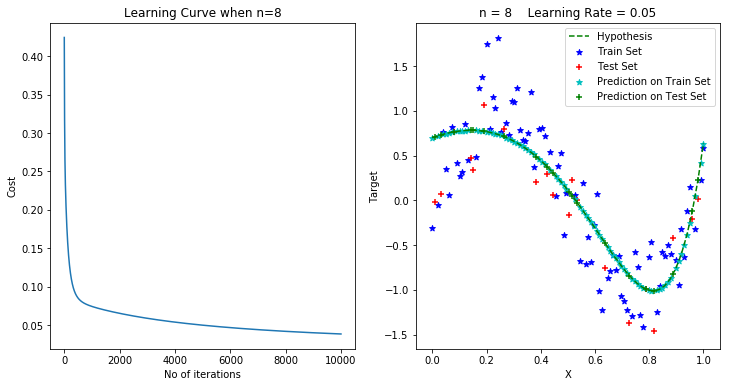

Squared Error in Test Set when N= 8  is: 0.01749344813217582
Squared Error in Train Set when N= 8  is: 0.03824898407411509


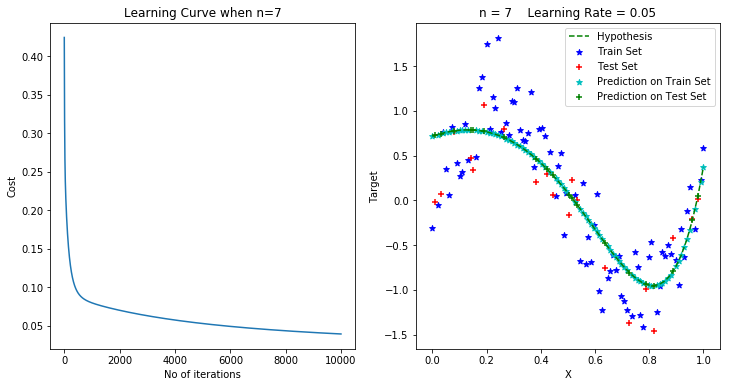

Squared Error in Test Set when N= 7  is: 0.01948032944756982
Squared Error in Train Set when N= 7  is: 0.039489956213432


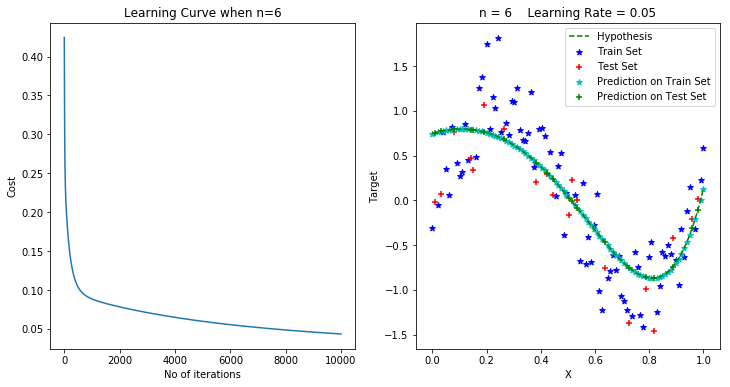

Squared Error in Test Set when N= 6  is: 0.023770518828412374
Squared Error in Train Set when N= 6  is: 0.043461067996290764


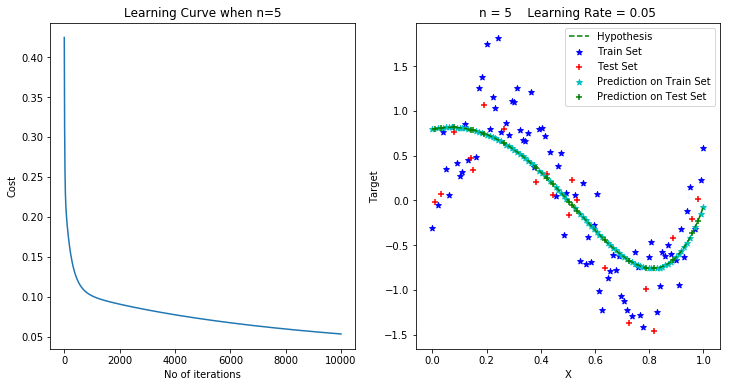

Squared Error in Test Set when N= 5  is: 0.03305211783385226
Squared Error in Train Set when N= 5  is: 0.053290393778943804


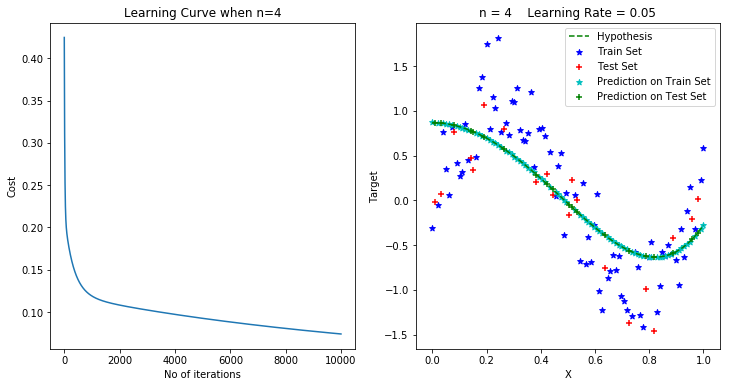

Squared Error in Test Set when N= 4  is: 0.051301499166320576
Squared Error in Train Set when N= 4  is: 0.07408757404343547


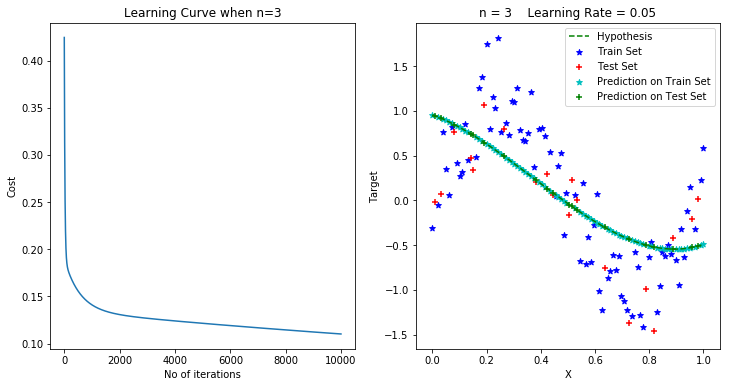

Squared Error in Test Set when N= 3  is: 0.08017968147257991
Squared Error in Train Set when N= 3  is: 0.11013550218979118


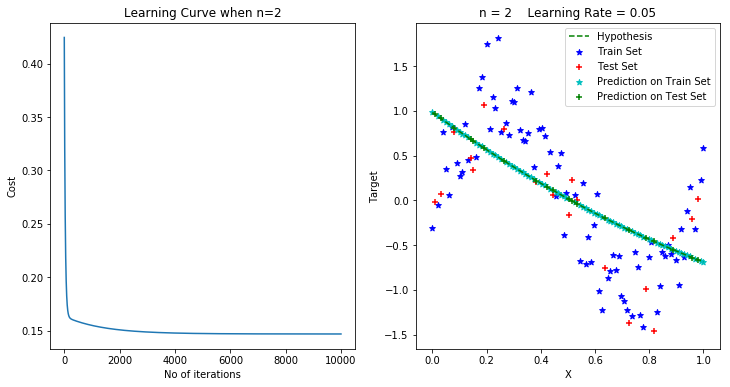

Squared Error in Test Set when N= 2  is: 0.10384291448493235
Squared Error in Train Set when N= 2  is: 0.14699597888469468


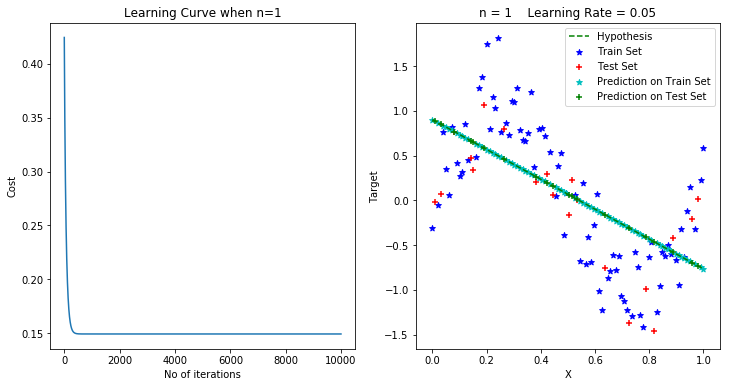

Squared Error in Test Set when N= 1  is: 0.10042590500751146
Squared Error in Train Set when N= 1  is: 0.14932403007453385


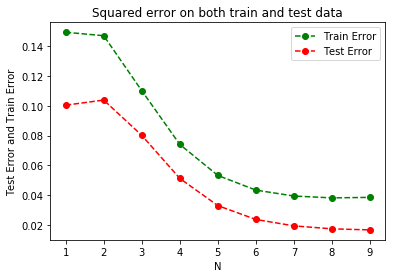

In [45]:
print "When Dataset Size = 100"
SIZE = 100
X,Y = Generate_Synthetic_Dataset(SIZE)
TrainX, TrainY, TestX, TestY = Split_Train_Test(X,Y)
DF_Thita100, DF_Error100 = DataFrame_Linear_Regression(TrainX, TrainY, TestX, TestY, No_of_iteration)
DF_Thita100.to_csv("Parameters_100.csv", sep='\t', encoding='utf-8')
DF_Error100.to_csv("Train_Test_Error_100.csv", sep='\t', encoding='utf-8')

When Dataset Size = 1000


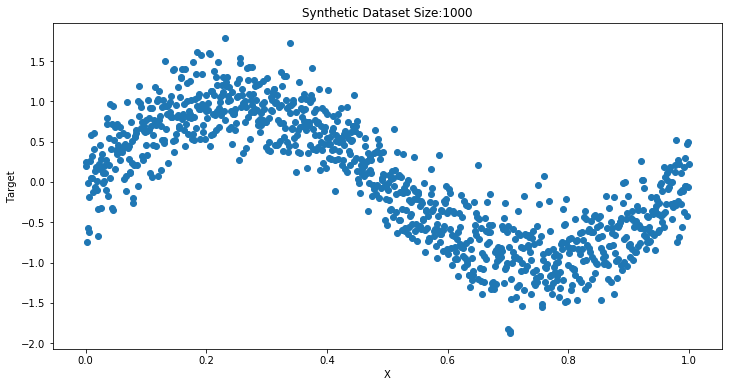

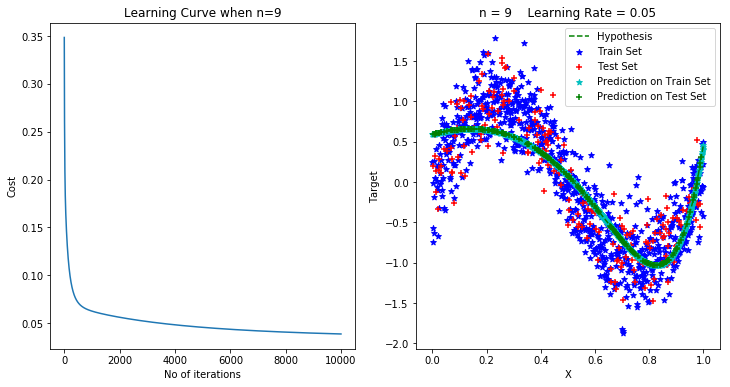

Squared Error in Test Set when N= 9  is: 0.028891102860084672
Squared Error in Train Set when N= 9  is: 0.038560700958430165


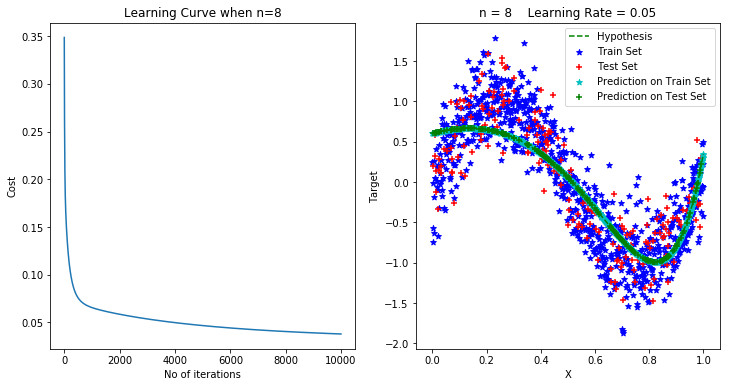

Squared Error in Test Set when N= 8  is: 0.027979252705443027
Squared Error in Train Set when N= 8  is: 0.0379061914281289


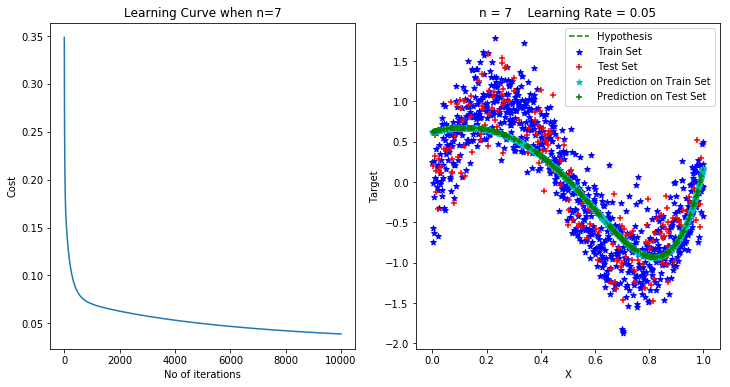

Squared Error in Test Set when N= 7  is: 0.028306776081058152
Squared Error in Train Set when N= 7  is: 0.038792450111430135


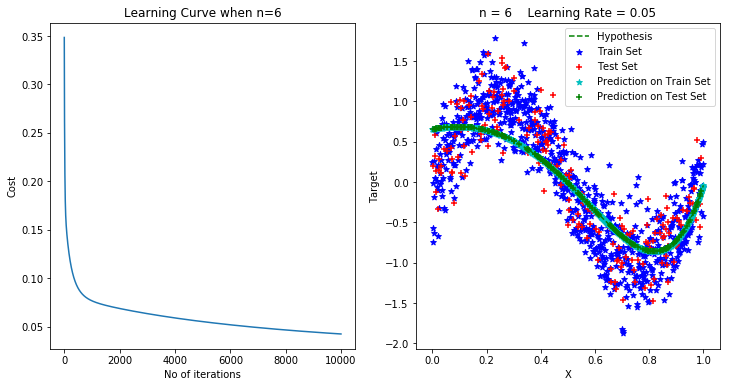

Squared Error in Test Set when N= 6  is: 0.03112964568277578
Squared Error in Train Set when N= 6  is: 0.04251167658825531


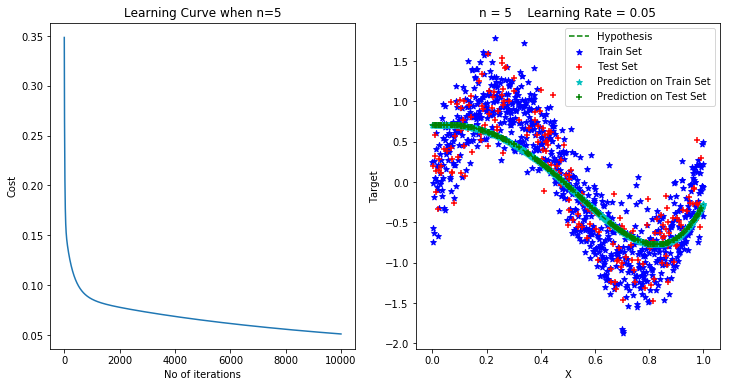

Squared Error in Test Set when N= 5  is: 0.03801288246220093
Squared Error in Train Set when N= 5  is: 0.05098828532278935


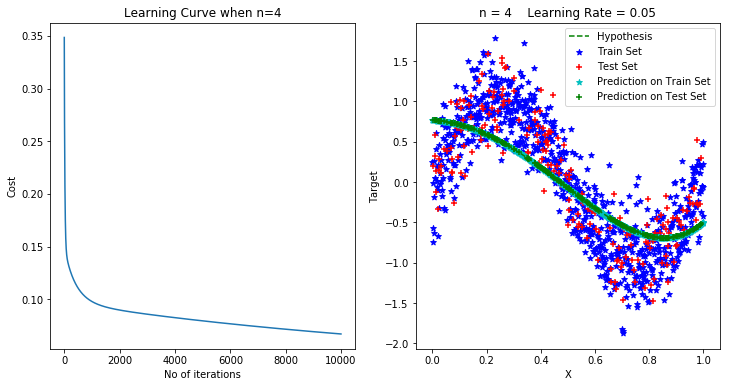

Squared Error in Test Set when N= 4  is: 0.05096015924937323
Squared Error in Train Set when N= 4  is: 0.06698502304460847


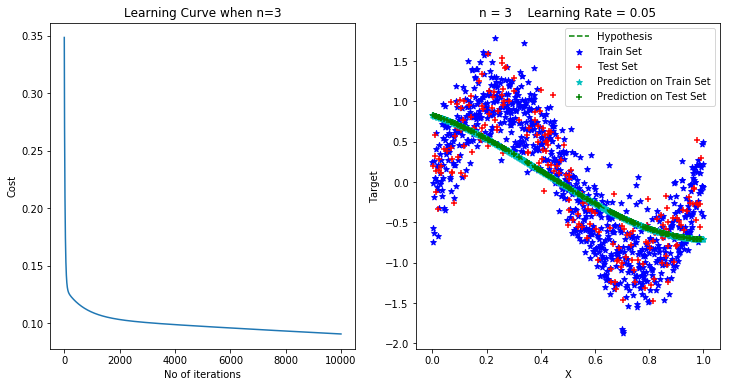

Squared Error in Test Set when N= 3  is: 0.06985091741188468
Squared Error in Train Set when N= 3  is: 0.0907431633464018


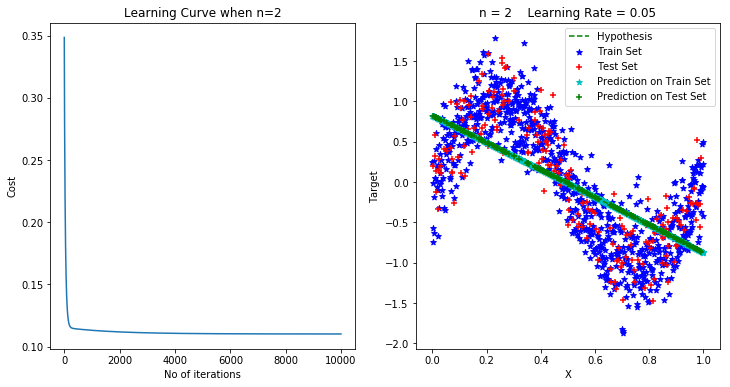

Squared Error in Test Set when N= 2  is: 0.08484558076499901
Squared Error in Train Set when N= 2  is: 0.11010759090644623


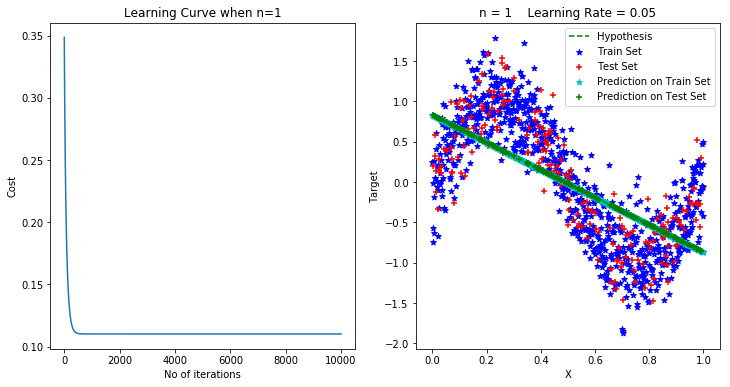

Squared Error in Test Set when N= 1  is: 0.08485291861141392
Squared Error in Train Set when N= 1  is: 0.11009274875184709


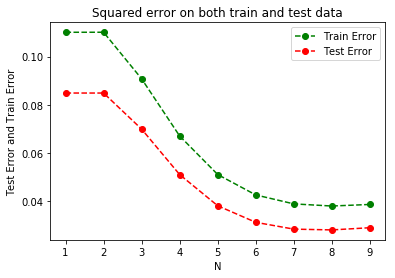

In [46]:
print "When Dataset Size = 1000"
SIZE = 1000
X,Y = Generate_Synthetic_Dataset(SIZE)
TrainX, TrainY, TestX, TestY = Split_Train_Test(X,Y)
DF_Thita1000, DF_Error1000 = DataFrame_Linear_Regression(TrainX, TrainY, TestX, TestY, No_of_iteration)
DF_Thita1000.to_csv("Parameters_1000.csv", sep='\t', encoding='utf-8')
DF_Error1000.to_csv("Train_Test_Error_1000.csv", sep='\t', encoding='utf-8')

When Dataset Size = 10000


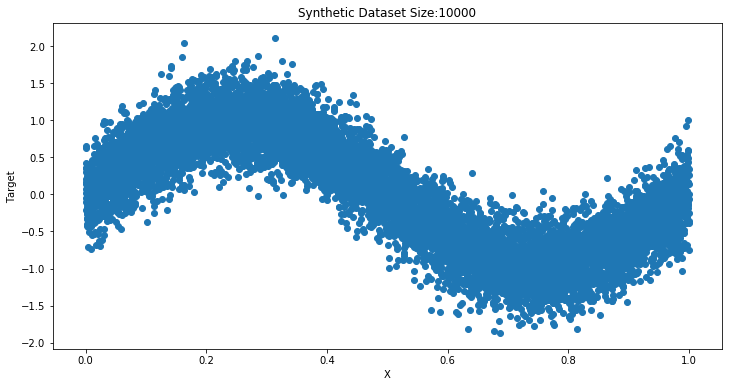

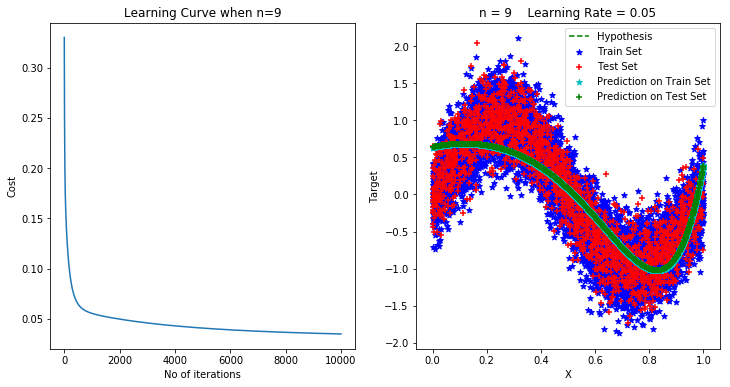

Squared Error in Test Set when N= 9  is: 0.03587430726843323
Squared Error in Train Set when N= 9  is: 0.03493116438429387


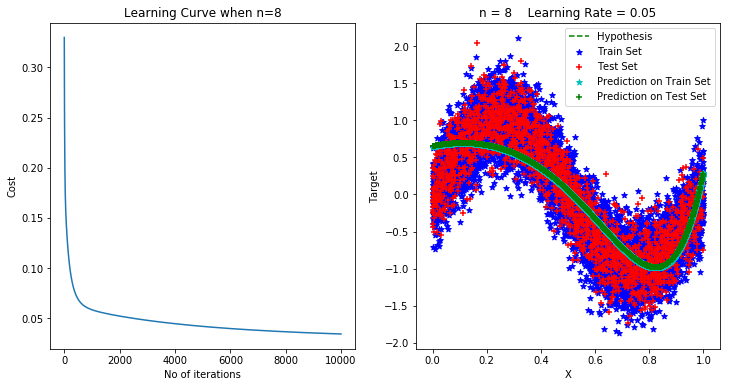

Squared Error in Test Set when N= 8  is: 0.03537298447314278
Squared Error in Train Set when N= 8  is: 0.03428012144589803


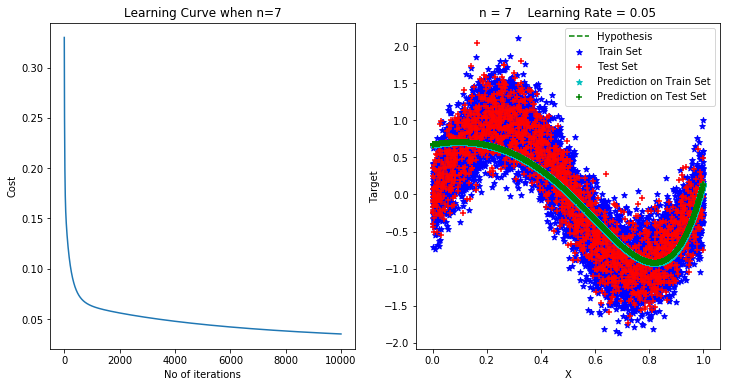

Squared Error in Test Set when N= 7  is: 0.036299754029081074
Squared Error in Train Set when N= 7  is: 0.03506620353849823


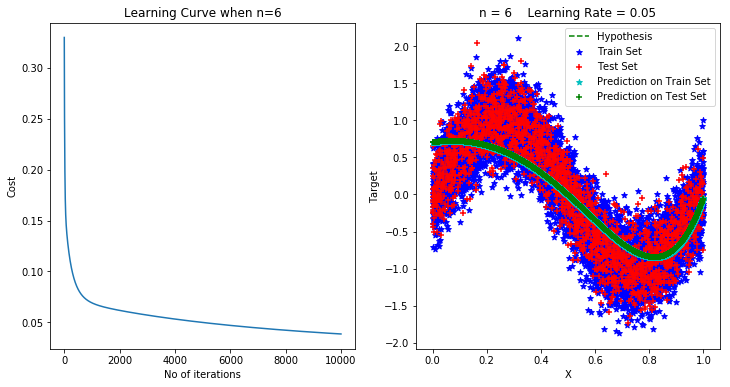

Squared Error in Test Set when N= 6  is: 0.039864575124796756
Squared Error in Train Set when N= 6  is: 0.038609061850147494


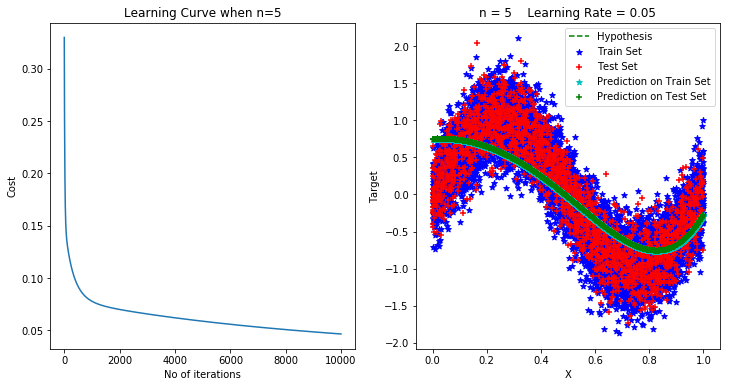

Squared Error in Test Set when N= 5  is: 0.047714822526052775
Squared Error in Train Set when N= 5  is: 0.046666144122348624


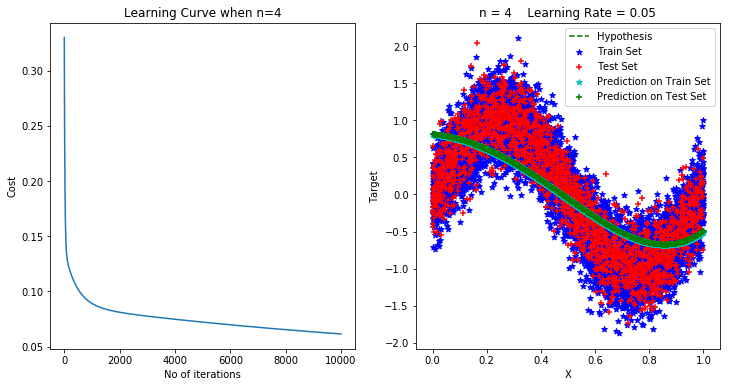

Squared Error in Test Set when N= 4  is: 0.06190929568812863
Squared Error in Train Set when N= 4  is: 0.06143874636134066


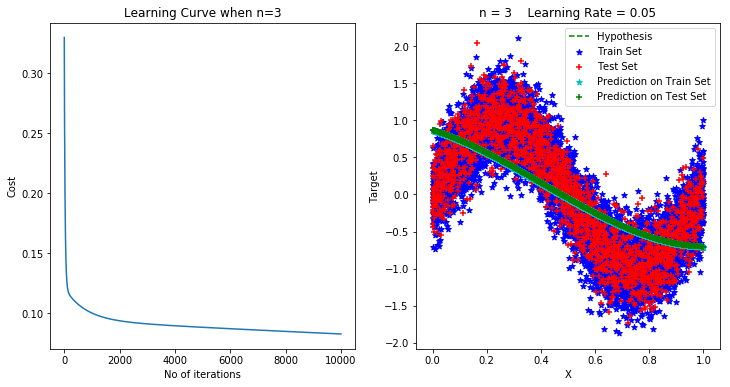

Squared Error in Test Set when N= 3  is: 0.08177847861390636
Squared Error in Train Set when N= 3  is: 0.08263939576151559


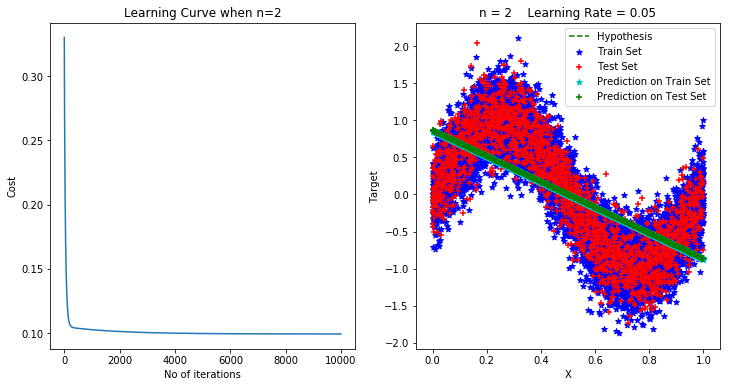

Squared Error in Test Set when N= 2  is: 0.09578948341271809
Squared Error in Train Set when N= 2  is: 0.09943886428919632


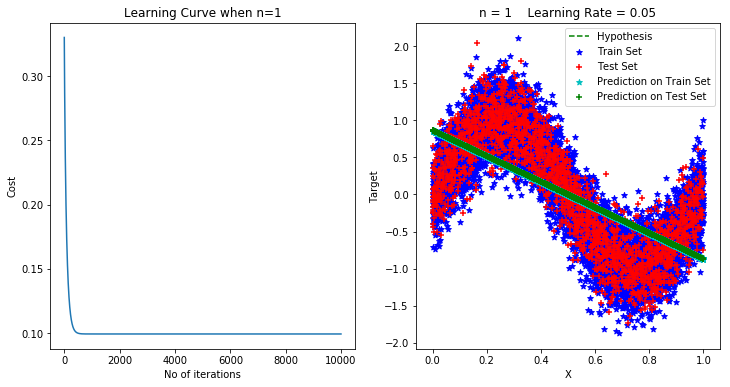

Squared Error in Test Set when N= 1  is: 0.09581785153470765
Squared Error in Train Set when N= 1  is: 0.09943280546839799


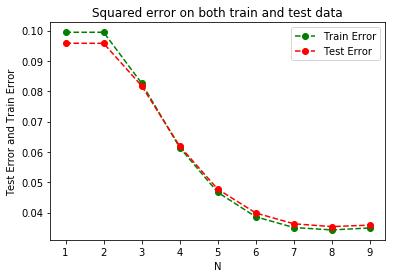

In [47]:
print "When Dataset Size = 10000"
SIZE = 10000
X,Y = Generate_Synthetic_Dataset(SIZE)
TrainX, TrainY, TestX, TestY = Split_Train_Test(X,Y)
DF_Thita10000, DF_Error10000 = DataFrame_Linear_Regression(TrainX, TrainY, TestX, TestY, No_of_iteration)
DF_Thita10000.to_csv("Parameters_10000.csv", sep='\t', encoding='utf-8')
DF_Error10000.to_csv("Train_Test_Error_10000.csv", sep='\t', encoding='utf-8')

### PART1 a) Generation of a synthetic dataset with dataset size =10

In [66]:
part1_data = pd.DataFrame()
part1_data['X']=pd.Series(X1)
part1_data['Y']=pd.Series(Y1)
part1_data

,X,Y
0,0.000000,-0.527749
1,0.111111,0.525235
2,0.222222,0.718366
3,0.333333,0.552284
4,0.444444,0.380707
5,0.555556,-0.327297
6,0.666667,-1.273806
7,0.777778,-1.194638
8,0.888889,-0.422817
9,1.000000,-0.096451


### PART1) c) Learned parameters 

In [86]:
DF_Thita10

,N=9,N=8,N=7,N=6,N=5,N=4,N=3,N=2,N=1
Thita0,0.019615,0.0286079,0.0412589,0.0586651,0.0809665,0.104206,0.113513,0.0864307,0.283969
Thita1,1.774881,1.714,1.61744,1.46156,1.21328,0.85152,0.474019,0.550576,-1.23965
Thita2,-2.981826,-3.07191,-3.17399,-3.26624,-3.28438,-3.07947,-2.45105,-2.09782,
Thita3,-2.419915,-2.37932,-2.28626,-2.08222,-1.65305,-0.81506,0.516901,,
Thita4,-1.055035,-0.88805,-0.61627,-0.159812,0.615546,1.88288,,,
Thita5,0.104494,0.360349,0.754299,1.37616,2.36421,,,,
Thita6,0.905042,1.21344,1.67741,2.3894,,,,,
Thita7,1.396146,1.72929,2.22421,,,,,,
Thita8,1.659987,1.99854,,,,,,,
Thita9,1.768456,,,,,,,,


### PART1) c) Squared Error on the test set and train set

In [80]:
DF_Error10

,Test Error,Train Error
N=1,0.136274,0.092558
N=2,0.866295,0.065776
N=3,0.610678,0.062695
N=4,0.211864,0.049488
N=5,0.025834,0.037029
N=6,0.000064,0.028456
N=7,0.003132,0.023072
N=8,0.103127,0.019719
N=9,0.646877,0.017579


# PART 3

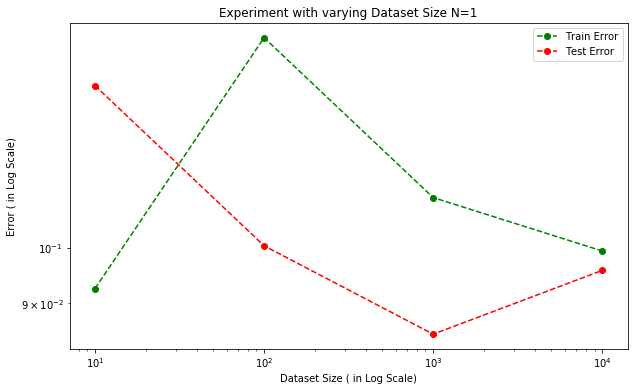

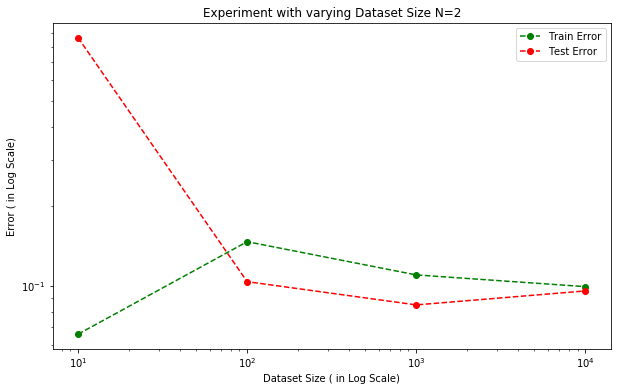

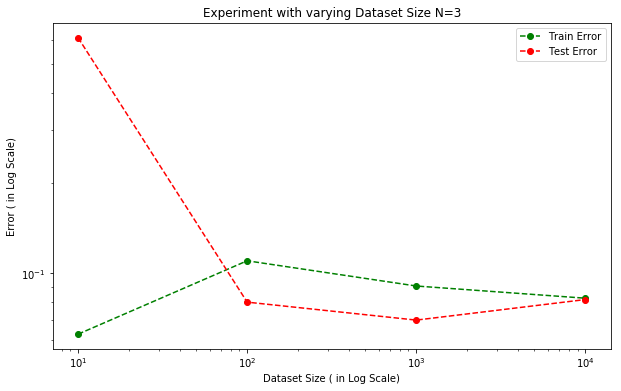

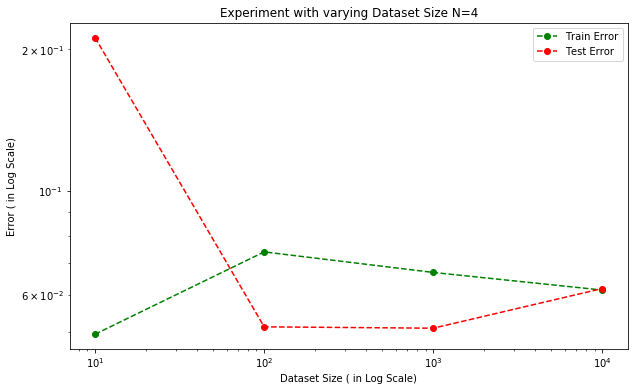

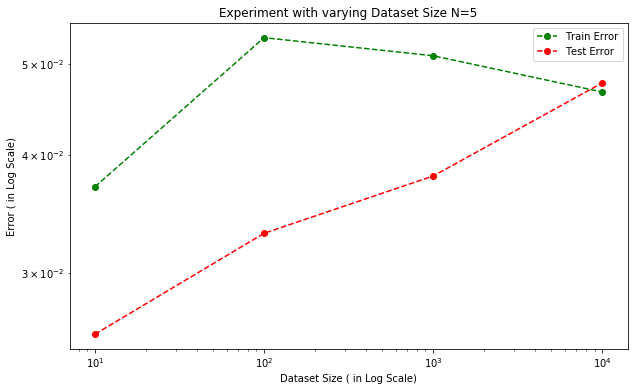

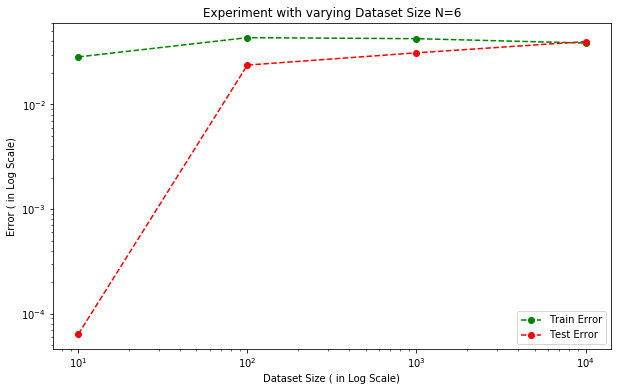

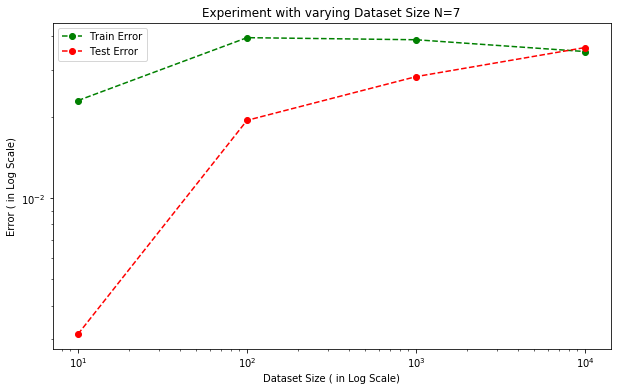

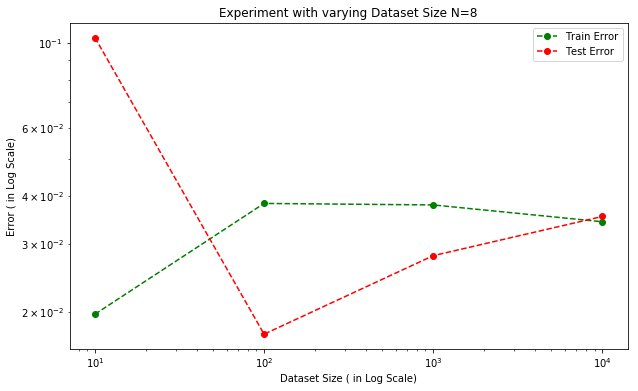

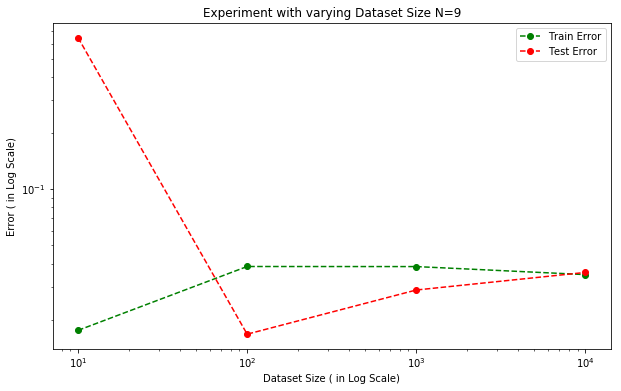

In [69]:
# ======================================== Part3 ======================================= #
for N in range(1,10):
    LC_X = [10,100,1000,10000]
    LC_train = []
    LC_test  = []

    LC_test.append( DF_Error10.loc['N='+str(N)]['Test Error'] )
    LC_train.append( DF_Error10.loc['N='+str(N)]['Train Error'] )


    LC_test.append( DF_Error100.loc['N='+str(N)]['Test Error'] )
    LC_train.append( DF_Error100.loc['N='+str(N)]['Train Error'] )

    LC_test.append( DF_Error1000.loc['N='+str(N)]['Test Error'] )
    LC_train.append( DF_Error1000.loc['N='+str(N)]['Train Error'] )

    LC_test.append( DF_Error10000.loc['N='+str(N)]['Test Error'] )
    LC_train.append( DF_Error10000.loc['N='+str(N)]['Train Error'] )

    LC_X = np.array(LC_X)
    LC_train = np.array(LC_train)
    LC_test  = np.array(LC_test)
    
    plt.figure(figsize=(10,6))
    plt.loglog(LC_X , LC_train, color='g', marker='o', linestyle='--', label='Train Error')
    plt.loglog(LC_X , LC_test,  color='r', marker='o', linestyle='--', label='Test Error')
    plt.xlabel('Dataset Size ( in Log Scale)')
    plt.ylabel('Error ( in Log Scale)')
    plt.title('Experiment with varying Dataset Size N='+str(N))
    plt.legend()
    plt.savefig('LC_Dataset_size_N'+str(N)+'.png')
    plt.show()
    plt.close()

# Part 4.a.i
## Cost function is Mean Absolute

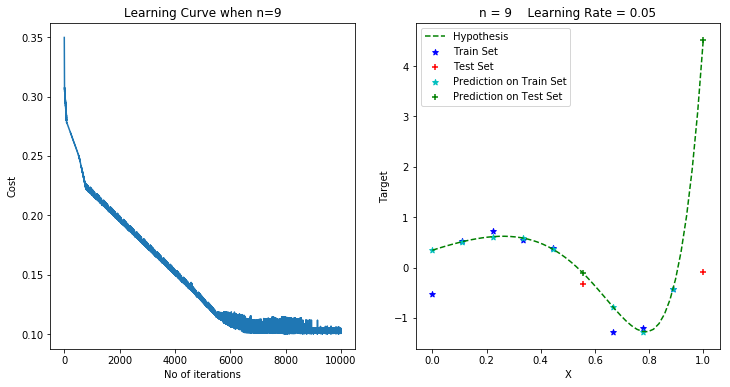

Mean absolute Error in Test Set when N= 9  is: 1.2065397079063012
Mean absolute Error in Train Set when N= 9  is: 0.1007675141144539


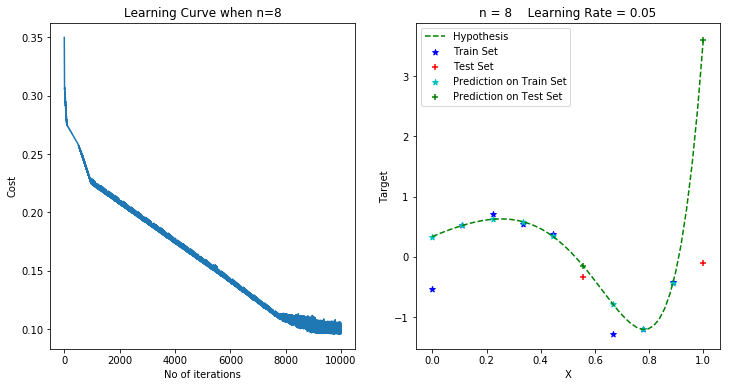

Mean absolute Error in Test Set when N= 8  is: 0.9686075493813692
Mean absolute Error in Train Set when N= 8  is: 0.09620815341945274


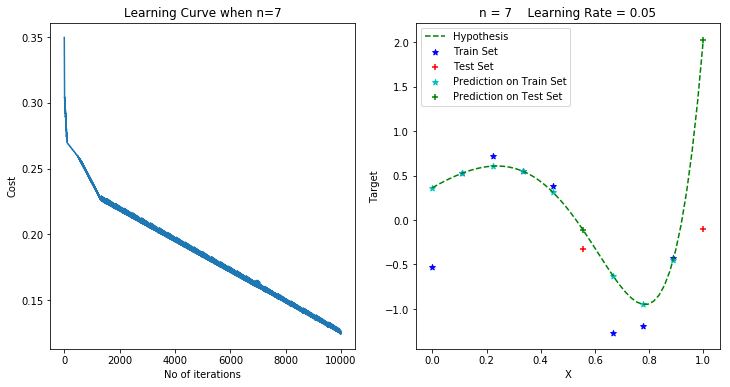

Mean absolute Error in Test Set when N= 7  is: 0.5833867094510332
Mean absolute Error in Train Set when N= 7  is: 0.12482260390037508


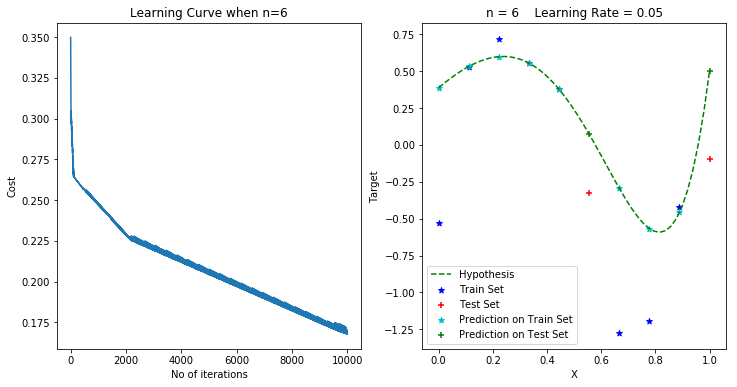

Mean absolute Error in Test Set when N= 6  is: 0.24973115186624956
Mean absolute Error in Train Set when N= 6  is: 0.1681244955498714


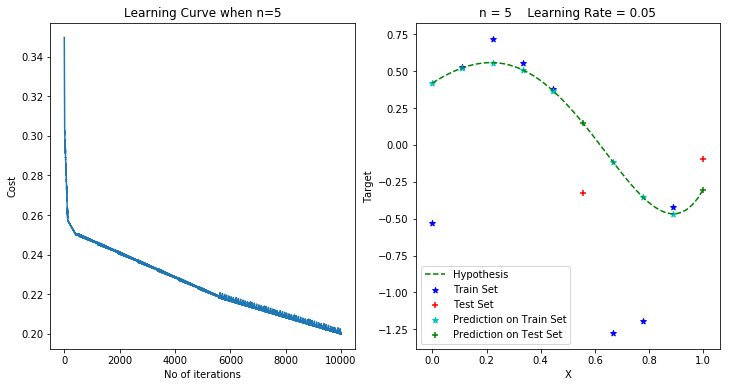

Mean absolute Error in Test Set when N= 5  is: 0.17053003908088643
Mean absolute Error in Train Set when N= 5  is: 0.20068028897639972


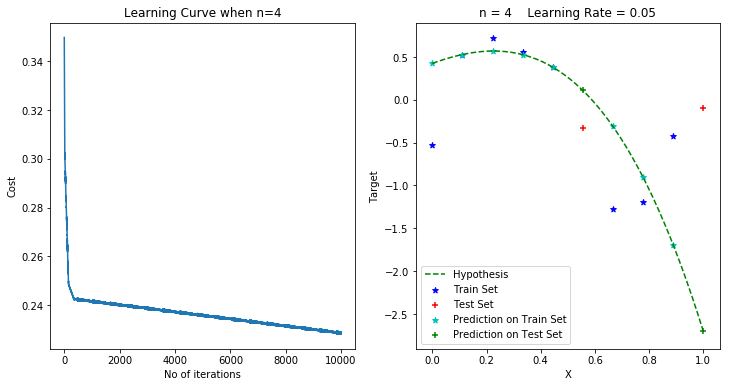

Mean absolute Error in Test Set when N= 4  is: 0.7595990049268834
Mean absolute Error in Train Set when N= 4  is: 0.2282509851748711


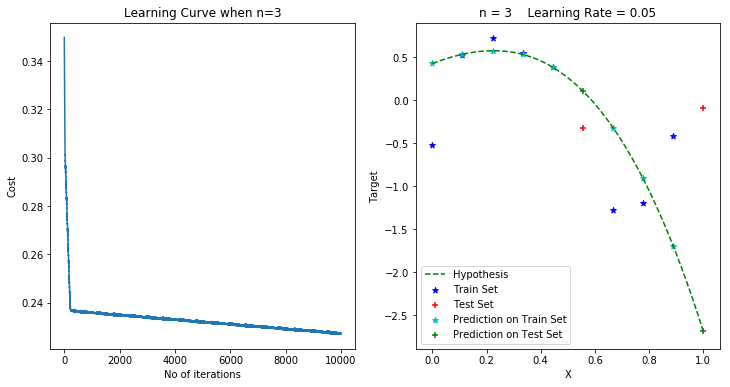

Mean absolute Error in Test Set when N= 3  is: 0.7553917387683138
Mean absolute Error in Train Set when N= 3  is: 0.22711175643503903


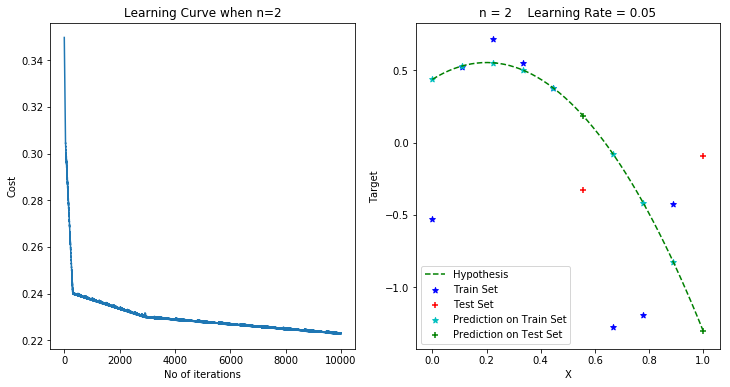

Mean absolute Error in Test Set when N= 2  is: 0.4306651463526329
Mean absolute Error in Train Set when N= 2  is: 0.22267306845038815


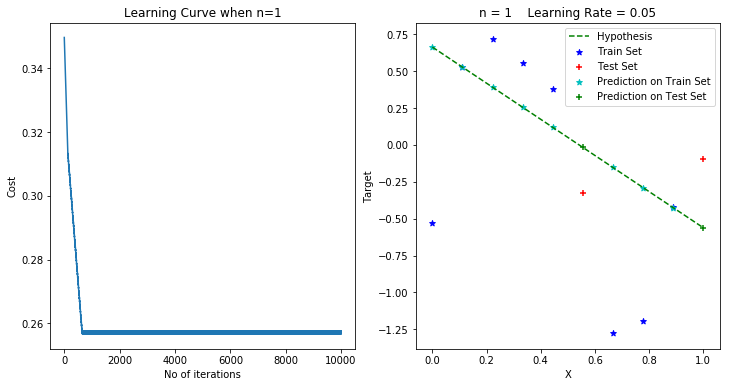

Mean absolute Error in Test Set when N= 1  is: 0.19366811846053705
Mean absolute Error in Train Set when N= 1  is: 0.2567104767227363


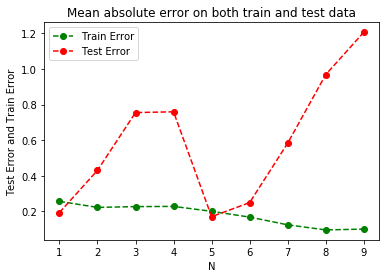

In [70]:
# =================================== PART4.a.i =================================== #
def gradient_descent3(X, Y, alpha, degree, iteration):  #Mean Absolute
    m = len(X)
    Pcost = []
    Pitr  = []
    # Parameters
    Thita = np.zeros(degree+1)
    for itr in range(0,iteration):
        Pitr.append(itr)
        # Hypothesis
        H = np.zeros(m)
        for i in range(0,degree+1):
            H = H+ Thita[i]*(np.power(X,i))
            
        # Cost
        Cost = (1.0/(2.0*m))*( sum( abs(H-Y) ) )
        Pcost.append(Cost)
        # Gradient Descent
        t=0
        for i in range(0,degree+1):
            for k in range(len(H-Y)):
                if((H-Y)[k] > 0):
                    t += (np.power(X[k],i))
                else:
                    t -= (np.power(X[k],i))
            Thita[i] = Thita[i] - (alpha*(1.0/(2.0*m))*(t))
    
    Pcost = np.array(Pcost)
    Pitr  = np.array(Pitr)
    plt.title('Learning Curve when n='+str(degree))
    plt.xlabel('No of iterations')
    plt.ylabel('Cost')
    plt.plot(Pitr, Pcost)
    return Thita

def PredictError3(X, Y, Thita):   # Mean Absolute 
    m = len(X)
    degree = len(Thita)-1
    H = np.zeros(m)
    for i in range(0,degree+1):
        H = H+ Thita[i]*(np.power(X,i))
    Cost = (1.0/(2.0*m))*( np.sum( np.abs(H-Y)) )
    return Cost

def DataFrame_Linear_Regression3(TrainX, TrainY, TestX, TestY, No_of_iteration):
    DF_Thita = pd.DataFrame()
    DF_Error = pd.DataFrame()
    TestError =[]
    TrainError =[]
    # Varing N from 1 to 9
    for N in range(9,0,-1):
        plt.figure(figsize=(12, 6))
        plt.subplot(1,2,1)
        # Estimating the Parameters
        Thita = gradient_descent3(TrainX, TrainY, 0.05, N, No_of_iteration)

        # Plot of Hypothesis, Test Set, Prediction on Test Set, Train Set, Prediction on Train Set
        plt.subplot(1,2,2)
        plt.scatter(TrainX, TrainY, color ='b',marker='*', label= 'Train Set')
        plt.scatter(TestX, TestY, color ='r', marker='+',label= 'Test Set')
        
        ALL = np.linspace(0, 1 , 50)
        PredY = Predict(ALL, Thita)
        plt.plot(ALL, PredY, color='g', linestyle='--', label='Hypothesis' )
        
        PredY = Predict(TrainX, Thita)
        plt.scatter(TrainX, PredY, color='c',  marker='*', label='Prediction on Train Set' )
        
        PredY_test = Predict(TestX, Thita)
        plt.scatter(TestX, PredY_test, color='g',  marker='+', label='Prediction on Test Set' )        
        
        plt.title('n = '+str(N)+'    Learning Rate = 0.05')
        plt.xlabel('X')
        plt.ylabel('Target')
        plt.legend()
        plt.savefig('Data'+str(len(TrainX)+len(TestX))+'_N'+str(N)+'_cost3.png')
        plt.show()
        plt.close()
        
        # Storing the Thita in a Dataframe
        DF_Thita['N='+str(N)]=pd.Series(Thita)
        a = PredictError3(TestX,TestY,Thita)
        b = PredictError3(TrainX,TrainY,Thita)
        print "Mean absolute Error in Test Set when N=",N, " is:", a
        print "Mean absolute Error in Train Set when N=",N, " is:", b
        TestError.append(a)
        TrainError.append(b)

    TestError = TestError[::-1]
    TrainError = TrainError[::-1]
    TestError = np.array(TestError)
    TrainError = np.array(TrainError)
    
    # plot of train error and test error
    plt.figure()
    Error_X = np.linspace(1,9,9)
    plt.title("Mean absolute error on both train and test data")
    plt.plot(Error_X, TrainError, color='g', marker='o', linestyle='--', label='Train Error')
    plt.plot(Error_X, TestError,  color='r', marker='o', linestyle='--', label='Test Error' )
    plt.xlabel('N')
    plt.ylabel('Test Error and Train Error')
    plt.legend()
    plt.savefig('Train_Test_Mean_absolute_Error_cost3.png')
    plt.show()
    plt.close()


    # Return Purpose
    for i in range(9,0,-1):
        DF_Thita['N='+str(i)].fillna(' ',inplace=True)
        DF_Error['Test Error']=pd.Series(TestError)
        DF_Error['Train Error']=pd.Series(TrainError)
    DF_Thita.rename(index={0:'Thita0',1:'Thita1',2:'Thita2',3:'Thita3',4:'Thita4',5:'Thita5',6:'Thita6',7:'Thita7',8:'Thita8',9:'Thita9'},inplace=True)
    DF_Error.rename(index={0:'N=1',1:'N=2',2:'N=3',3:'N=4',4:'N=5',5:'N=6',6:'N=7',7:'N=8',8:'N=9'},inplace=True)
    return DF_Thita, DF_Error

SIZE = 10
TrainX1, TrainY1, TestX1, TestY1 = Split_Train_Test(X1,Y1)
DF_Thita10cost3, DF_Error10cost3 = DataFrame_Linear_Regression3(TrainX1, TrainY1, TestX1, TestY1, No_of_iteration)
DF_Thita10cost3.to_csv("Parameters_10_cost3.csv", sep='\t', encoding='utf-8')
DF_Error10cost3.to_csv("Train_Test_Error_10_cost3.csv", sep='\t', encoding='utf-8')

In [87]:
DF_Thita10cost3

,N=9,N=8,N=7,N=6,N=5,N=4,N=3,N=2,N=1
Thita0,0.343750,0.3375,0.3625,0.3875,0.41875,0.425,0.425,0.4375,0.6625
Thita1,1.722917,1.89444,1.74167,1.54306,1.16528,1.15347,1.19028,1.16389,-1.22361
Thita2,-1.336497,-1.62361,-1.85756,-1.83704,-1.85116,-1.73719,-1.77932,-2.90602,
Thita3,-3.412269,-3.95737,-3.94352,-3.39808,-2.65161,-2.34589,-2.52203,,
Thita4,-3.771141,-4.11141,-3.54451,-2.34111,-0.707599,-0.194018,,,
Thita5,-2.719541,-2.41775,-1.08305,0.804761,3.32367,,,,
Thita6,-0.707834,0.56699,2.79907,5.34428,,,,,
Thita7,1.881033,4.34983,7.54407,,,,,,
Thita8,4.764069,8.55602,,,,,,,
Thita9,7.745561,,,,,,,,


In [88]:
DF_Error10cost3

,Test Error,Train Error
N=1,0.193668,0.256710
N=2,0.430665,0.222673
N=3,0.755392,0.227112
N=4,0.759599,0.228251
N=5,0.170530,0.200680
N=6,0.249731,0.168124
N=7,0.583387,0.124823
N=8,0.968608,0.096208
N=9,1.206540,0.100768


# Part 4.a.ii
## Cost function is Fourth Power

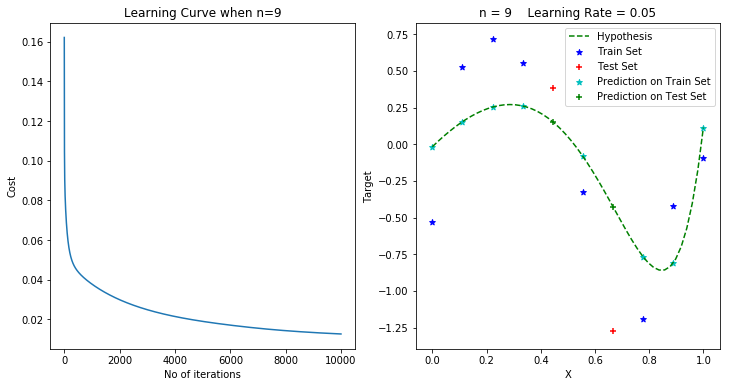

Four power Error in Test Set when N= 9  is: 0.1296830812189923
Four power Error in Train Set when N= 9  is: 0.012629347771110957


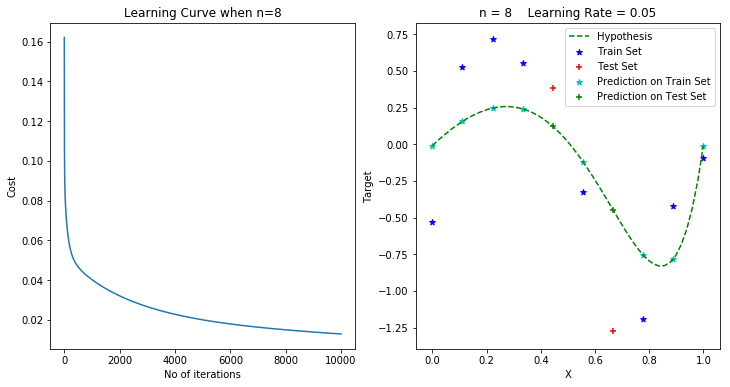

Four power Error in Test Set when N= 8  is: 0.1175173950597837
Four power Error in Train Set when N= 8  is: 0.012853438036982015


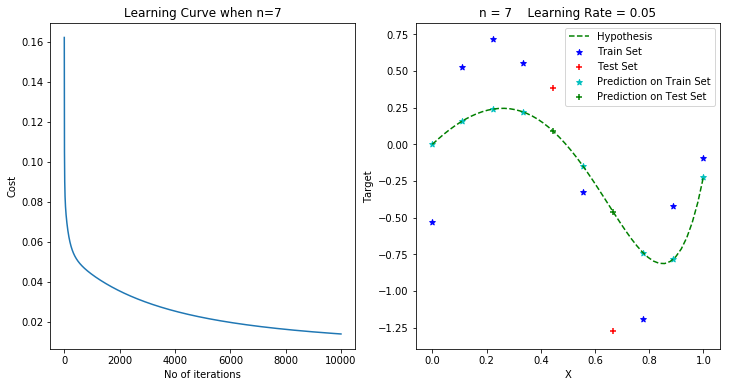

Four power Error in Test Set when N= 7  is: 0.11157180841132917
Four power Error in Train Set when N= 7  is: 0.013812288957995859


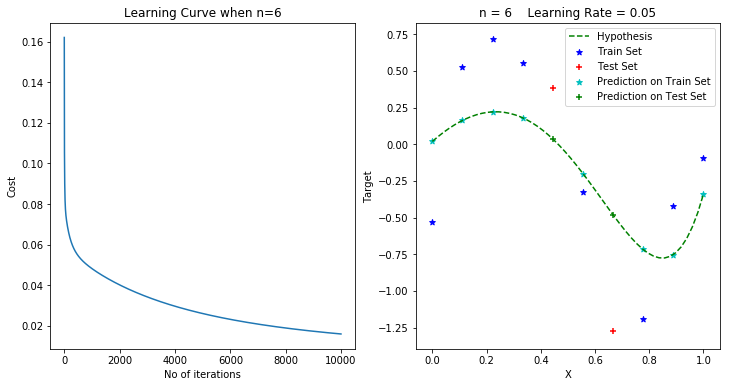

Four power Error in Test Set when N= 6  is: 0.10228016564624437
Four power Error in Train Set when N= 6  is: 0.015939411281456345


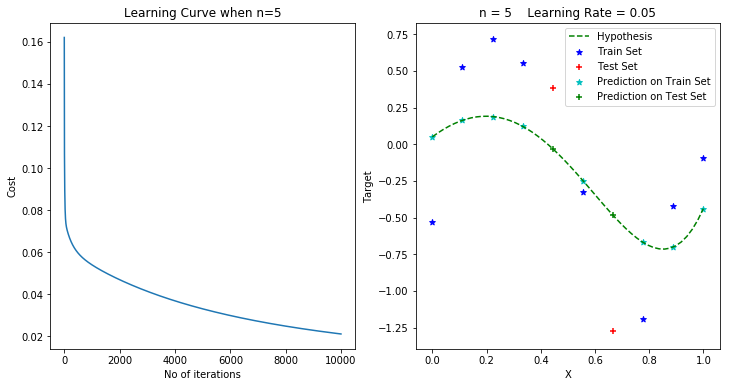

Four power Error in Test Set when N= 5  is: 0.10422325939621244
Four power Error in Train Set when N= 5  is: 0.021113503231371154


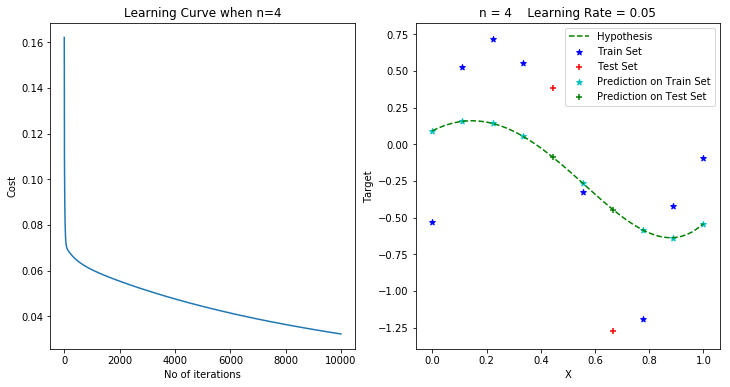

Four power Error in Test Set when N= 4  is: 0.1296404825356597
Four power Error in Train Set when N= 4  is: 0.03224437197092004


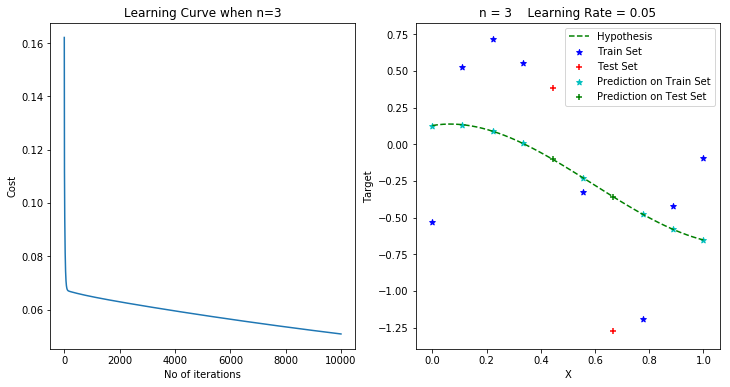

Four power Error in Test Set when N= 3  is: 0.1900624614106998
Four power Error in Train Set when N= 3  is: 0.05083395473632092


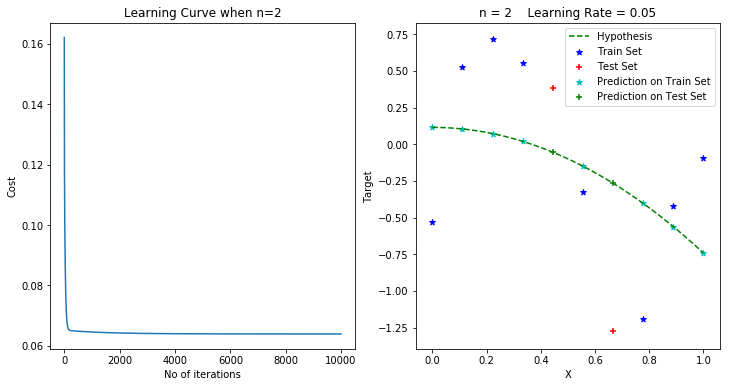

Four power Error in Test Set when N= 2  is: 0.26701957287817035
Four power Error in Train Set when N= 2  is: 0.06394894057578937


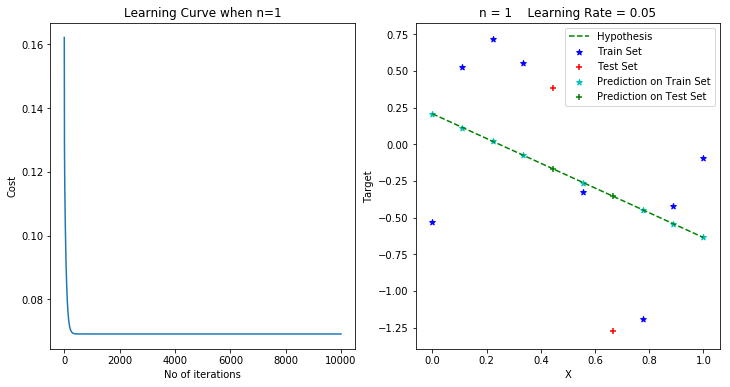

Four power Error in Test Set when N= 1  is: 0.2009797792271647
Four power Error in Train Set when N= 1  is: 0.06918906291278278


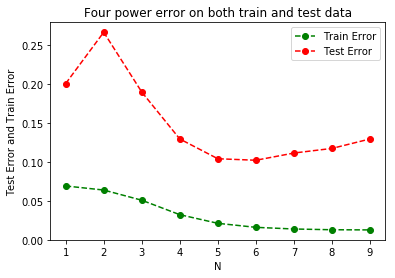

In [73]:
# =================================== PART4.a.ii =================================== #
def gradient_descent2(X, Y, alpha, degree, iteration):   #Fourth power
    m = len(X)
    Pcost = []
    Pitr  = []
    # Parameters
    Thita = np.zeros(degree+1)
    for itr in range(0,iteration):
        Pitr.append(itr)
        # Hypothesis
        H = np.zeros(m)
        for i in range(0,degree+1):
            H = H+ Thita[i]*(np.power(X,i))
            
        # Cost
        Cost = (1.0/(2.0*m))*( sum( ((H-Y)*(H-Y))*((H-Y)*(H-Y)) ) )
        Pcost.append(Cost)
        # Gradient Descent
        for i in range(0,degree+1):
            Temp = ((H-Y)*(H-Y)*(H-Y))*(np.power(X,i))
            Thita[i] = Thita[i] - (alpha*(2.0/m)*(sum(Temp)))
    
    Pcost = np.array(Pcost)
    Pitr  = np.array(Pitr)
    plt.title('Learning Curve when n='+str(degree))
    plt.xlabel('No of iterations')
    plt.ylabel('Cost')
    plt.plot(Pitr, Pcost)
    return Thita
def PredictError2(X, Y, Thita):  #Fourth power
    m = len(X)
    degree = len(Thita)-1
    H = np.zeros(m)
    for i in range(0,degree+1):
        H = H+ Thita[i]*(np.power(X,i))
    Cost = (1.0/(2.0*m))*( sum( ((H-Y)*(H-Y))*((H-Y)*(H-Y)) ) )
    return Cost

def DataFrame_Linear_Regression2(TrainX, TrainY, TestX, TestY, No_of_iteration):
    DF_Thita = pd.DataFrame()
    DF_Error = pd.DataFrame()
    TestError =[]
    TrainError =[]
    # Varing N from 1 to 9
    for N in range(9,0,-1):
        plt.figure(figsize=(12, 6))
        plt.subplot(1,2,1)
        # Estimating the Parameters
        Thita = gradient_descent2(TrainX, TrainY, 0.05, N, No_of_iteration)

        # Plot of Hypothesis, Test Set, Prediction on Test Set, Train Set, Prediction on Train Set
        plt.subplot(1,2,2)
        plt.scatter(TrainX, TrainY, color ='b',marker='*', label= 'Train Set')
        plt.scatter(TestX, TestY, color ='r', marker='+',label= 'Test Set')
        
        ALL = np.linspace(0, 1 , 50)
        PredY = Predict(ALL, Thita)
        plt.plot(ALL, PredY, color='g', linestyle='--', label='Hypothesis' )
        
        PredY = Predict(TrainX, Thita)
        plt.scatter(TrainX, PredY, color='c',  marker='*', label='Prediction on Train Set' )
        
        PredY_test = Predict(TestX, Thita)
        plt.scatter(TestX, PredY_test, color='g',  marker='+', label='Prediction on Test Set' )        
        
        plt.title('n = '+str(N)+'    Learning Rate = 0.05')
        plt.xlabel('X')
        plt.ylabel('Target')
        plt.legend()
        plt.savefig('Data'+str(len(TrainX)+len(TestX))+'_N'+str(N)+'_cost2.png')
        plt.show()
        plt.close()

        # Storing the Thita in a Dataframe
        DF_Thita['N='+str(N)]=pd.Series(Thita)
        a = PredictError2(TestX,TestY,Thita)
        b = PredictError2(TrainX,TrainY,Thita)
        print "Four power Error in Test Set when N=",N, " is:", a
        print "Four power Error in Train Set when N=",N, " is:", b
        TestError.append(a)
        TrainError.append(b)

    TestError = TestError[::-1]
    TrainError = TrainError[::-1]
    TestError = np.array(TestError)
    TrainError = np.array(TrainError)
    
    # plot of train error and test error
    plt.figure()
    Error_X = np.linspace(1,9,9)
    plt.title("Four power error on both train and test data")
    plt.plot(Error_X, TrainError, color='g', marker='o', linestyle='--', label='Train Error')
    plt.plot(Error_X, TestError,  color='r', marker='o', linestyle='--', label='Test Error' )
    plt.xlabel('N')
    plt.ylabel('Test Error and Train Error')
    plt.legend()
    plt.savefig('Train_Test_Four_power_Error_cost2.png')
    plt.show()
    plt.close()

    # Return Purpose
    for i in range(9,0,-1):
        DF_Thita['N='+str(i)].fillna(' ',inplace=True)
        DF_Error['Test Error']=pd.Series(TestError)
        DF_Error['Train Error']=pd.Series(TrainError)
    DF_Thita.rename(index={0:'Thita0',1:'Thita1',2:'Thita2',3:'Thita3',4:'Thita4',5:'Thita5',6:'Thita6',7:'Thita7',8:'Thita8',9:'Thita9'},inplace=True)
    DF_Error.rename(index={0:'N=1',1:'N=2',2:'N=3',3:'N=4',4:'N=5',5:'N=6',6:'N=7',7:'N=8',8:'N=9'},inplace=True)
    return DF_Thita, DF_Error

SIZE = 10
TrainX1, TrainY1, TestX1, TestY1 = Split_Train_Test(X1,Y1)
DF_Thita10cost2, DF_Error10cost2 = DataFrame_Linear_Regression2(TrainX1, TrainY1, TestX1, TestY1, No_of_iteration)
DF_Thita10cost2.to_csv("Parameters_10_cost2.csv", sep='\t', encoding='utf-8')
DF_Error10cost2.to_csv("Train_Test_Error_10_cost2.csv", sep='\t', encoding='utf-8')


In [89]:
DF_Thita10cost2

,N=9,N=8,N=7,N=6,N=5,N=4,N=3,N=2,N=1
Thita0,-0.016976,-0.00971887,-0.000674416,0.0191968,0.0503012,0.0914955,0.127471,0.114656,0.207608
Thita1,1.796495,1.76571,1.73587,1.61693,1.37026,0.932971,0.308579,-0.000499769,-0.843381
Thita2,-2.122878,-2.27524,-2.47066,-2.74568,-3.03022,-3.1188,-2.48445,-0.855394,
Thita3,-1.941667,-2.0014,-2.04648,-2.01706,-1.73352,-0.81015,1.3959,,
Thita4,-1.084977,-1.00969,-0.84778,-0.450383,0.449404,2.36353,,,
Thita5,-0.274632,-0.0693326,0.287585,1.01821,2.45497,,,,
Thita6,0.362229,0.681045,1.20573,2.21676,,,,,
Thita7,0.832047,1.24681,1.91168,,,,,,
Thita8,1.166562,1.6615,,,,,,,
Thita9,1.397205,,,,,,,,


In [90]:
DF_Error10cost2

,Test Error,Train Error
N=1,0.200980,0.069189
N=2,0.267020,0.063949
N=3,0.190062,0.050834
N=4,0.129640,0.032244
N=5,0.104223,0.021114
N=6,0.102280,0.015939
N=7,0.111572,0.013812
N=8,0.117517,0.012853
N=9,0.129683,0.012629


# Part 4 b

plotting for N=9


/home/vaibhav/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in multiply
/home/vaibhav/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in multiply
/home/vaibhav/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in multiply


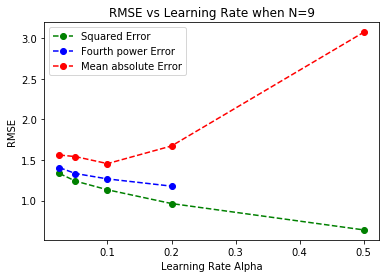

plotting for N=8


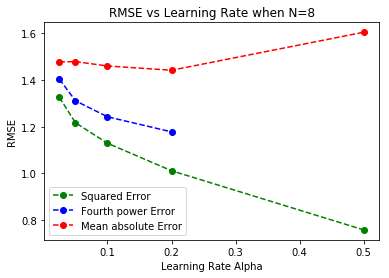

plotting for N=7


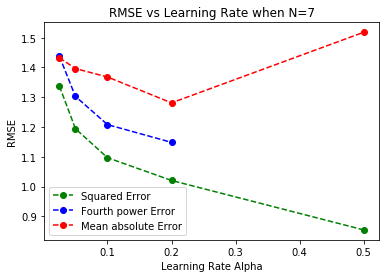

plotting for N=6


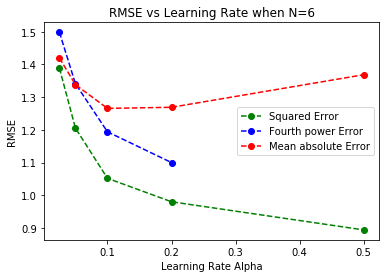

plotting for N=5


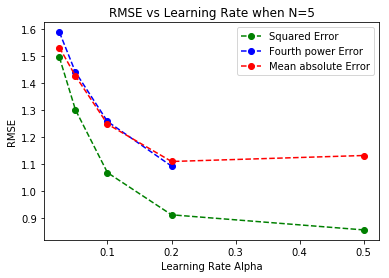

plotting for N=4


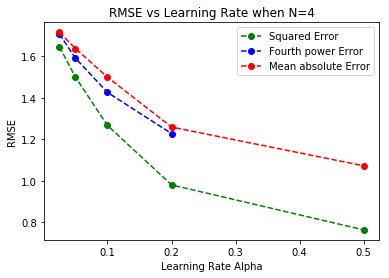

plotting for N=3


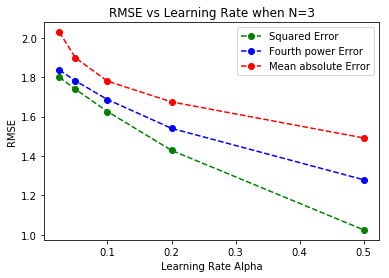

plotting for N=2


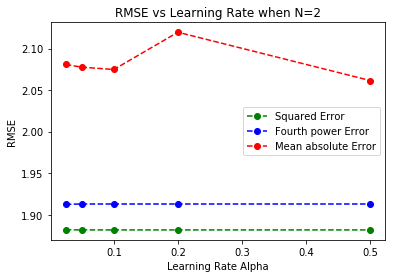

plotting for N=1


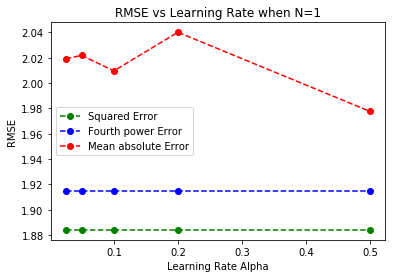

In [76]:
# =================================== PART4.b======================================== #

def gradient_descent_Cost1(X, Y, alpha, degree, iteration):
    m = len(X)
    # Parameters
    Thita = np.zeros(degree+1)
    for itr in range(0,iteration):
        
        # Hypothesis
        H = np.zeros(m)
        for i in range(0,degree+1):
            H = H+ Thita[i]*(np.power(X,i))
            
        # Cost
        Cost = (1.0/(2.0*m))*( sum( (H-Y)*(H-Y) ) )
        
        # Gradient Descent
        for i in range(0,degree+1):
            Temp = (H-Y)*(np.power(X,i))
            Thita[i] = Thita[i] - (alpha*(1.0/m)*(sum(Temp)))
    return Thita
def gradient_descent_Cost2(X, Y, alpha, degree, iteration):
    m = len(X)
    # Parameters
    Thita = np.zeros(degree+1)
    for itr in range(0,iteration):
        
        # Hypothesis
        H = np.zeros(m)
        for i in range(0,degree+1):
            H = H+ Thita[i]*(np.power(X,i))
            
        # Cost
        Cost = (1.0/(2.0*m))*( sum( ((H-Y)*(H-Y))*((H-Y)*(H-Y)) ) )
        
        # Gradient Descent
        for i in range(0,degree+1):
            Temp = ((H-Y)*(H-Y)*(H-Y))*(np.power(X,i))
            Thita[i] = Thita[i] - (alpha*(2.0/m)*(sum(Temp)))
    
    return Thita
def gradient_descent_Cost3(X, Y, alpha, degree, iteration):
    m = len(X)
    # Parameters
    Thita = np.zeros(degree+1)
    for itr in range(0,iteration):
        
        # Hypothesis
        H = np.zeros(m)
        for i in range(0,degree+1):
            H = H+ Thita[i]*(np.power(X,i))
            
        # Cost
        Cost = (1.0/(2.0*m))*( sum( abs(H-Y) ) )
        
        # Gradient Descent
        t=0
        for i in range(0,degree+1):
            for k in range(len(H-Y)):
                if((H-Y)[k] > 0):
                    t += (np.power(X[k],i))
                else:
                    t -= (np.power(X[k],i))
            Thita[i] = Thita[i] - (alpha*(1.0/(2.0*m))*(t))
    return Thita

ALPHA = np.array([0.025,0.05,0.1,0.2,0.5])
for degree in range(9,0,-1):
    RMSE_Y1 =[]
    RMSE_Y2 =[]
    RMSE_Y3 =[]
    print 'plotting for N='+str(degree)
    for alpha in ALPHA:
        Thita = gradient_descent_Cost1(X1, Y1, alpha, degree,No_of_iteration)
        H     = Predict(X1, Thita)
        RMSE  = np.sqrt(sum((H-Y1)*(H-Y1)))
        RMSE_Y1.append(RMSE)

        Thita = gradient_descent_Cost2(X1, Y1, alpha, degree,No_of_iteration)
        H     = Predict(X1, Thita)
        RMSE  = np.sqrt(sum((H-Y1)*(H-Y1)))
        RMSE_Y2.append(RMSE)
    
        Thita = gradient_descent_Cost3(X1, Y1, alpha, degree,No_of_iteration)
        H     = Predict(X1, Thita)
        RMSE  = np.sqrt(sum((H-Y1)*(H-Y1)))
        RMSE_Y3.append(RMSE)
        
        
    plt.plot(ALPHA, RMSE_Y1, color='g', marker='o', linestyle='--', label='Squared Error')
    plt.plot(ALPHA, RMSE_Y2, color='b', marker='o', linestyle='--', label='Fourth power Error')
    plt.plot(ALPHA, RMSE_Y3, color='r', marker='o', linestyle='--', label='Mean absolute Error')
    plt.xlabel('Learning Rate Alpha')
    plt.ylabel('RMSE')
    plt.title('RMSE vs Learning Rate when N='+str(degree))
    plt.legend()
    plt.savefig('RMSE_N'+str(degree)+'.png')
    plt.show()
    plt.close()